Taking `examples/examples.ipynb` as a starting point.  

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append("..")
sys.path.append("../..")

import numpy as np 
import pandas as pd
import yellowbrick as yb

In [3]:
from yellowbrick.features.rankd import Rank1D, Rank2D, rank1d, rank2d

In [4]:
# !pip install pandas requests nose

### Dataset

In [5]:
# %run download.py

In [6]:
from download import download_all 

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
}

def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Return the data frame
    return pd.read_csv(path)

In [7]:
# Load the classification data set
data = load_data('credit') 
data.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

X = data[features]
y = data.default

### Rank1D 
New visualizer

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


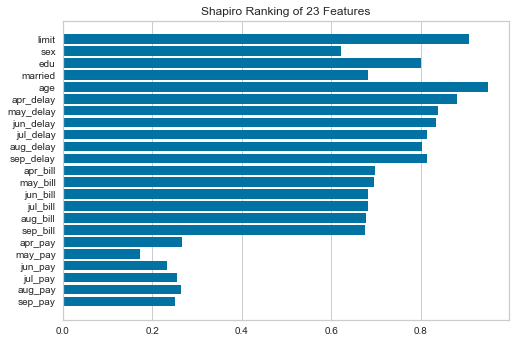

In [9]:
# get features from column names...
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit_transform_show(X, y);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


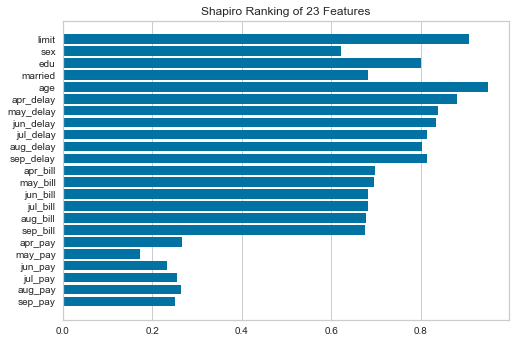

In [10]:
# Raw numpy version
visualizer = Rank1D(algorithm='shapiro', features=features)
visualizer.fit_transform_show(X.values, y.values);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


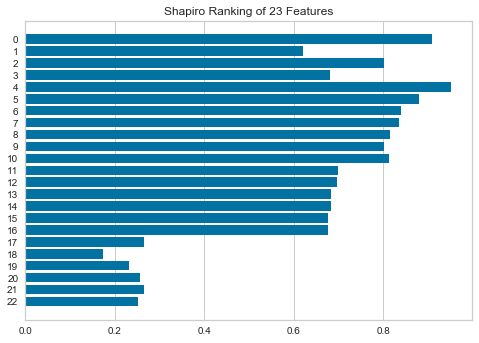

In [11]:
# numpy version, no feature names
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit_transform_show(X.values, y.values);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


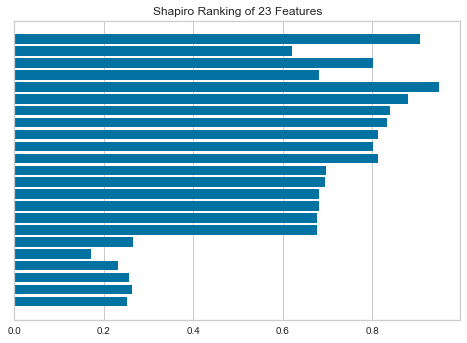

In [12]:
# disable tick labels
visualizer = Rank1D(algorithm='shapiro', show_feature_names=False)
visualizer.fit_transform_show(X.values, y.values);

#### vertical orient

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


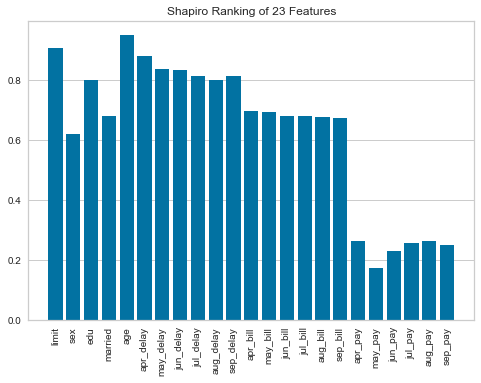

In [13]:
# get features from column names...
visualizer = Rank1D(algorithm='shapiro', orient='v')
visualizer.fit_transform_show(X, y);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


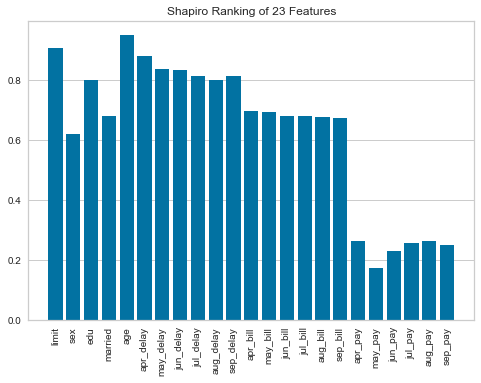

In [14]:
# Raw numpy version
visualizer = Rank1D(algorithm='shapiro', features=features, orient='v')
visualizer.fit_transform_show(X.values, y.values);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


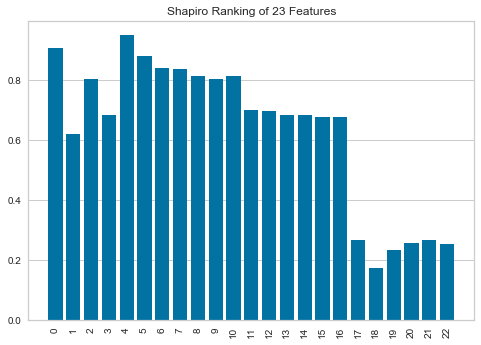

In [15]:
# numpy version, no feature names
visualizer = Rank1D(algorithm='shapiro', orient='v')
visualizer.fit_transform_show(X.values, y.values);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


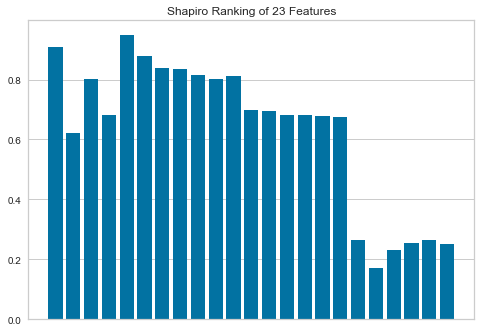

In [16]:
# disable tick labels
visualizer = Rank1D(algorithm='shapiro', show_feature_names=False, orient='v')
visualizer.fit_transform_show(X.values, y.values);

#### quick methods

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


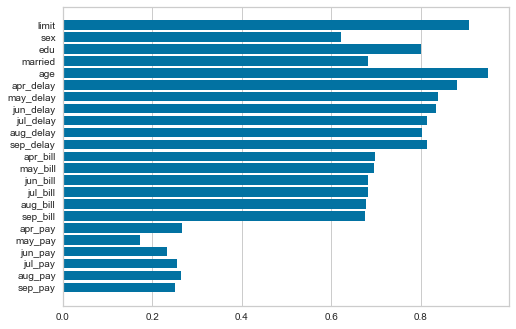

In [17]:
# get features from column names...
rank1d(X, y);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


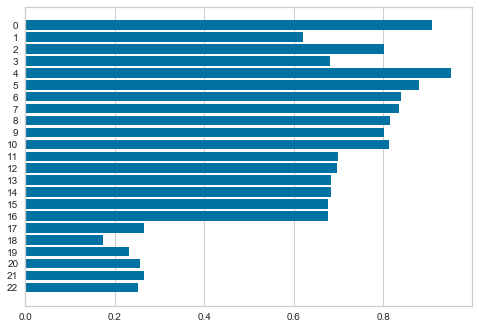

In [18]:
# Raw numpy version
rank1d(X.values, y.values);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


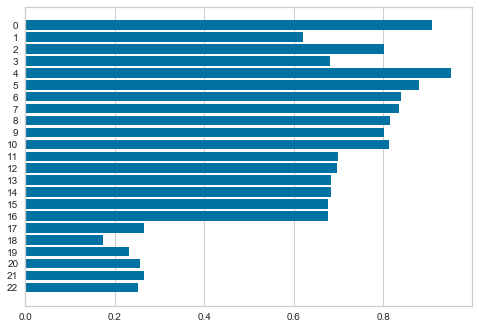

In [19]:
# numpy version, no feature names
rank1d(X.values, y.values);

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


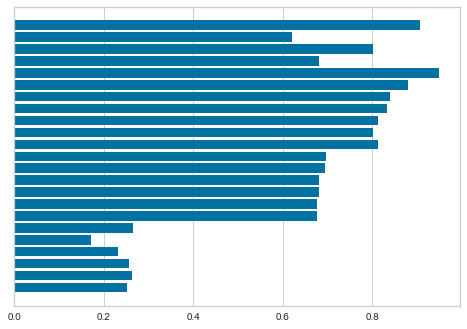

In [20]:
# disable tick labels
rank1d(X.values, y.values, show_feature_names=False);

#### quick methods, vertical

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


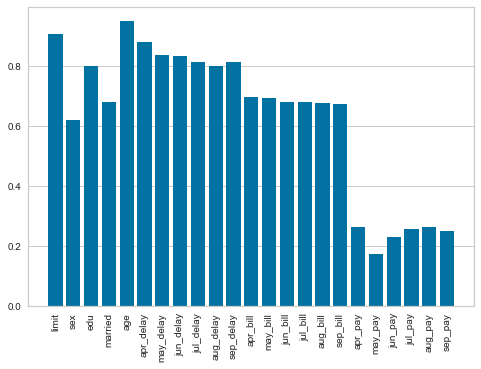

In [21]:
# get features from column names...
rank1d(X, y, orient='v');

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


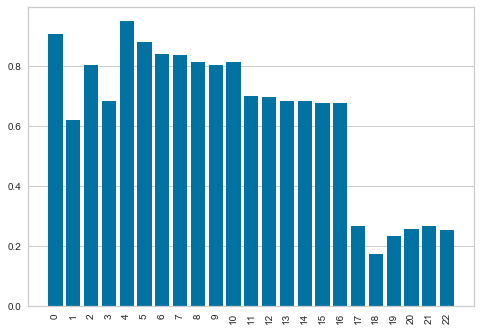

In [22]:
# Raw numpy version
rank1d(X.values, y.values, orient='v');

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


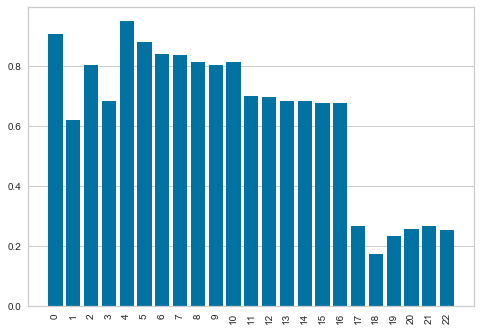

In [23]:
# numpy version, no feature names
rank1d(X.values, y.values, orient='v');

/Users/pschafer/.virtualenvs/yellowbrick/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


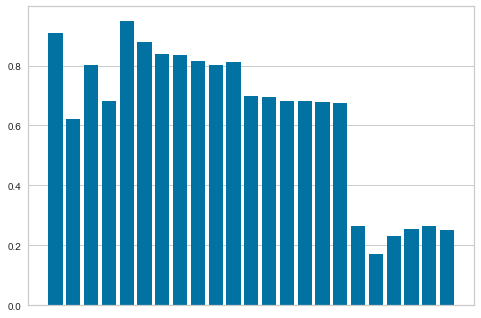

In [24]:
# disable tick labels
rank1d(X.values, y.values, show_feature_names=False, orient='v');

### Rank2D 
Fixing order of the tick labels, using the feature names to label.

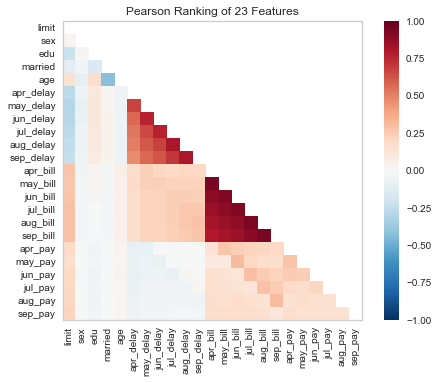

In [25]:
# get features from column names...
visualizer = Rank2D()
visualizer.fit_transform_show(X, y);

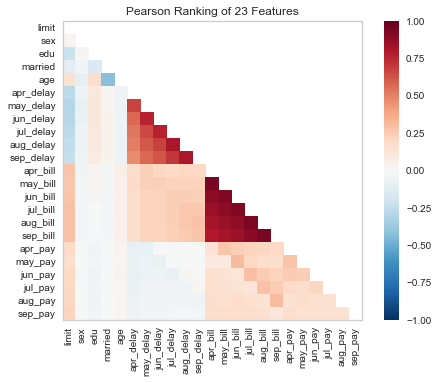

In [26]:
# raw numpy version
visualizer = Rank2D(features=features)
visualizer.fit_transform_show(X.values, y.values);

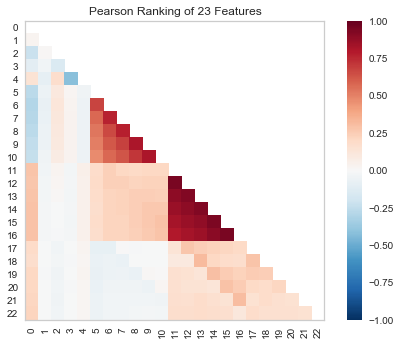

In [27]:
# numpy version, no feature names
visualizer = Rank2D()
visualizer.fit_transform_show(X.values, y.values);

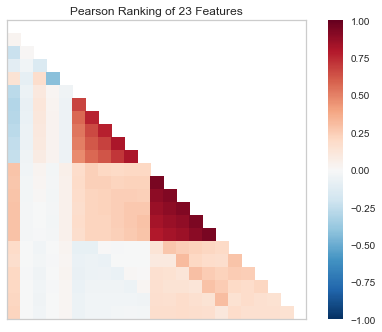

In [28]:
# disable tick labels
visualizer = Rank2D(show_feature_names=False)
visualizer.fit_transform_show(X.values, y.values);

#### Quick method

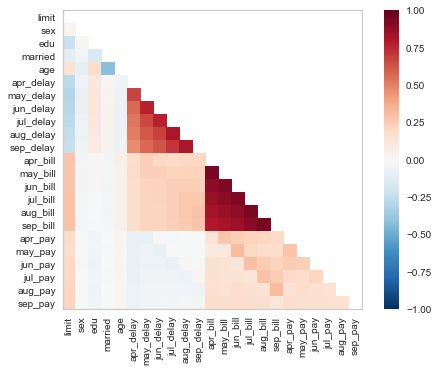

In [29]:
# get features from column names...
rank2d(X);

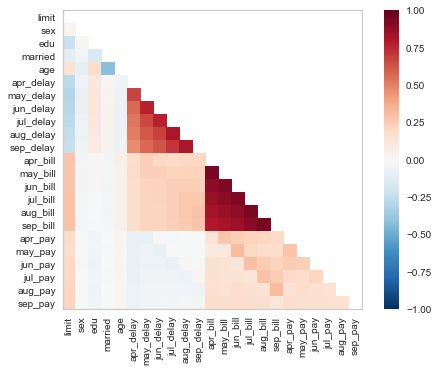

In [30]:
# raw numpy version
rank2d(X.values, features=features);

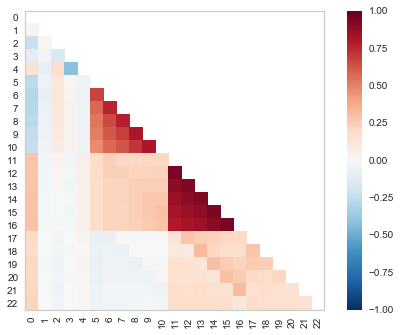

In [31]:
# numpy version, no feature names
rank2d(X.values);

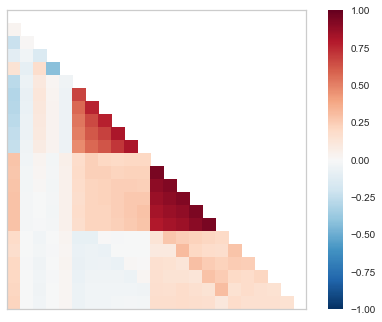

In [32]:
# disable tick labels
rank2d(X, show_feature_names=False);